In [1]:
import nltk
from nltk.corpus import movie_reviews
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
movie_reviews.categories()

['neg', 'pos']

In [3]:
len(movie_reviews.fileids(movie_reviews.categories()))

2000

In [4]:
(movie_reviews.words('neg/cv000_29416.txt'))

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [5]:
movie_reviews.encoding('neg/cv000_29416.txt')

'ascii'

In [6]:
document = [(list(movie_reviews.words(fileids = fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(categories=category)]

In [7]:
len(document)

2000

In [8]:
def processing(*args):
    remove_punctuation = [word for word in args if word not in string.punctuation]
    stop_words = stopwords.words('english')
    remove_stop_words = [word for word in remove_punctuation if word not in stop_words]
    word_list = [word.lower() for word in remove_stop_words if word.isalpha()]
    return word_list

In [9]:
print(document[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

In [10]:
word_features = processing(*movie_reviews.words())

In [11]:
word_freq= nltk.FreqDist(word_features)

In [12]:
dict(word_freq.most_common(20))

{'film': 9517,
 'one': 5852,
 'movie': 5771,
 'like': 3690,
 'even': 2565,
 'good': 2411,
 'time': 2411,
 'story': 2169,
 'would': 2109,
 'much': 2049,
 'character': 2020,
 'also': 1967,
 'get': 1949,
 'two': 1911,
 'well': 1906,
 'characters': 1859,
 'first': 1836,
 'see': 1749,
 'way': 1693,
 'make': 1642}

In [14]:
wc = WordCloud().generate(' '.join(word_features))

(-0.5, 399.5, 199.5, -0.5)

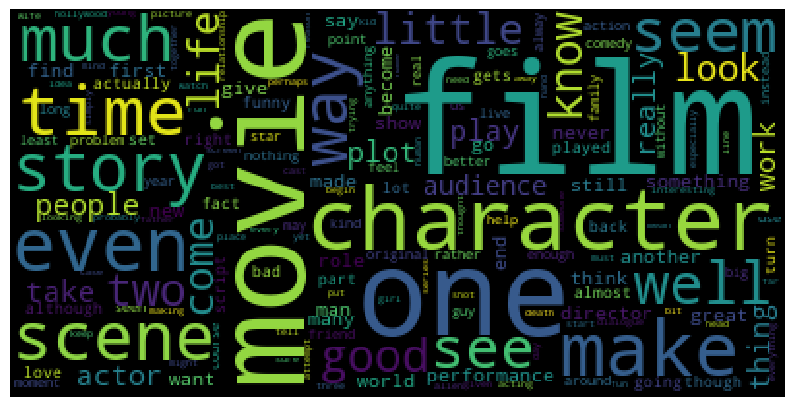

In [15]:
plt.figure(figsize=(10,9), dpi=100)
plt.imshow(wc)
plt.axis('off')

In [36]:
def find_features(document):
    word  = set(document)
    featutre = {}
    for w in word_features[:2000]:
        featutre[w] = (w in word)
    return featutre

In [37]:
# find_features(movie_reviews.words('neg/cv000_29416.txt'))

In [38]:
featureset = [(find_features(doc), category) for (doc, category) in document] 

In [39]:
import random

In [40]:
random.shuffle(featureset)

In [41]:
train_set = featureset[:1800]
test_set = featureset[1800:]

In [42]:
classifier = nltk.NaiveBayesClassifier.train(train_set)  ## :param labeled_featuresets: A list of classified featuresets,
                                                            ### i.e., a list of tuples ``(featureset, label)``.

In [43]:
nltk.classify.accuracy(classifier, test_set)

0.8

In [44]:
classifier.show_most_informative_features(10)

Most Informative Features
              schumacher = True              neg : pos    =      7.4 : 1.0
                  wasted = True              neg : pos    =      6.8 : 1.0
                 singers = True              pos : neg    =      6.3 : 1.0
                  turkey = True              neg : pos    =      6.3 : 1.0
                   waste = True              neg : pos    =      5.7 : 1.0
                  poorly = True              neg : pos    =      5.6 : 1.0
                   awful = True              neg : pos    =      5.5 : 1.0
              ridiculous = True              neg : pos    =      5.2 : 1.0
                 unravel = True              pos : neg    =      5.0 : 1.0
                  welles = True              neg : pos    =      5.0 : 1.0
